In [16]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [17]:
%matplotlib inline

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

<h1 style="text-align: center;">An Analysis of Top Investment Banks</h1>

<hr>

<h2> Research Questions to Answer: </h2>

<div class="alert alert-block alert-success">
    <ul><h3>
        <li>What are the largest investment banks by market share and how did they trend during a five-year window?</li>
        <li>What are the size of the banks currently based on total revenue and total assets and how do they compare to IB fees?</li>
        <li>How big of a portion of these banks non-interest income are IB fees?</li>  
        <li>What are some statistical trends in the data?</li>
    </ul>
</div>

<hr>

<h2> Obstacles: </h2>

<div class="alert alert-block alert-info">
    <ul><h3>
        <li>2022 numbers were not yet available for all banks.</li>
        <li>Numbers represented are in millions</li>
        <li>We used 10-Ks from the SEC's Edgar database where possible. For banks outside the US, we used annual reports. </li> 
        <li>Each bank has numerous amounts of legal entities, subsidiaries, and lines of business </li>
    </ul>
</div>

<hr>

In [19]:
bank_data_to_load = "DATA/final_bank_data.csv"
bank_data_df = pd.read_csv(bank_data_to_load)

In [20]:
color_scheme = ["darkred","orange","purple","green","darkblue","pink","darkgreen","red","teal","blue",]
year = [year for year in bank_data_df["Fiscal Year"].unique()]
x_tick_locations = [value for value in year]


## What are the largest investment banks by market share and how did they trend during a five-year window?

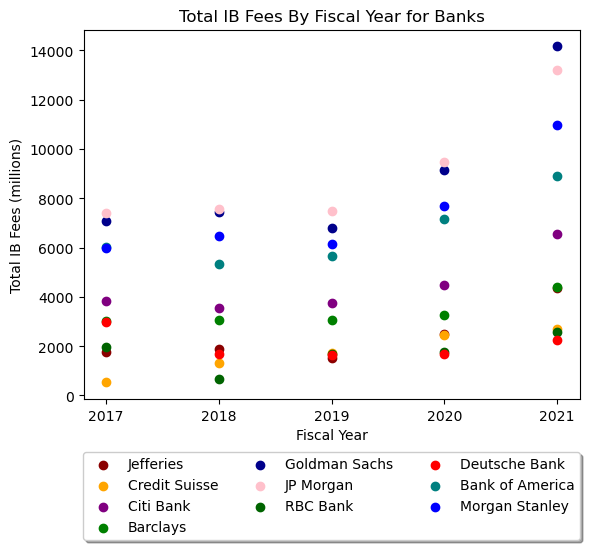

In [21]:
i = 0
bank_list = bank_data_df['Bank'].unique()

while i < len(bank_list):
    plt.scatter(year, bank_data_df.loc[bank_data_df['Bank'] == bank_list[i], ['Total IB Fees']], marker ='o',
                color = color_scheme[i], label=bank_list[i])
    i += 1

plt.xlabel("Fiscal Year")
plt.ylabel("Total IB Fees (millions)")
plt.xticks(x_tick_locations)
plt.title("Total IB Fees By Fiscal Year for Banks")
legend= plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.40),
          ncol=3, fancybox=True, shadow=True)

plt.show()

In [22]:
#############################################################sandbox

In [23]:
bank_data_df.head(1)

,Bank,Fiscal Year,Total IB Fees,Market Share %,Net Interest Income,Non Interest Income,Total Revenue,Total Non-Interest Expense,Net Income,Total Assets,Total Liabilities,Equity,IB Fees as a % of Net Revenue,IB Fees as a % of Non-Interest Income
0,Jefferies,2021,4366,0.06,89,8097,8185,5760,2426,604040,496740,107300,0.53,0.54


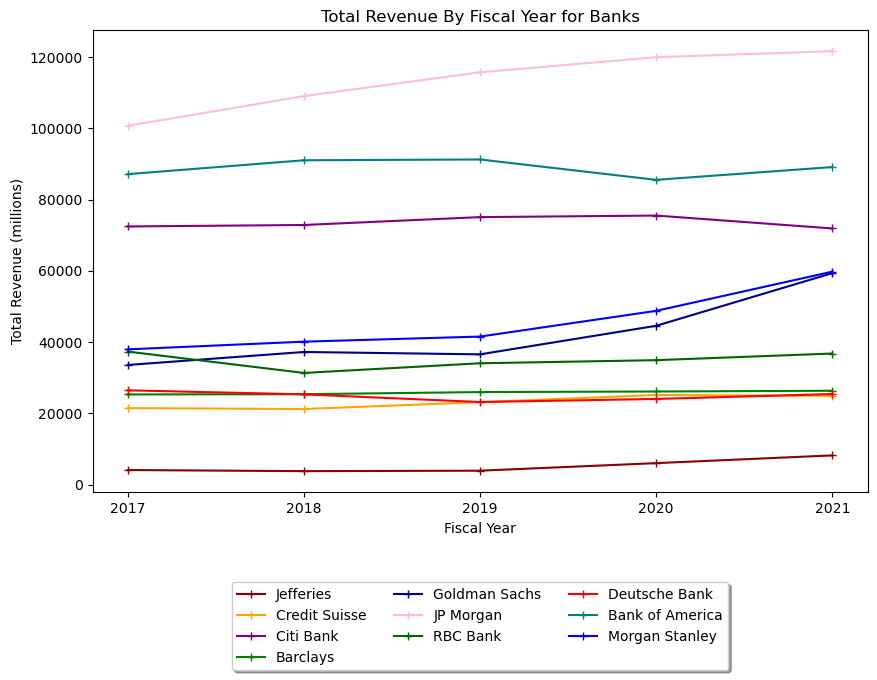

In [53]:
#Net Revenue
#Net Revenue = Total Revenue - Net Interest Income? right now im using total revenue, working on net

i = 0
bank_list = bank_data_df['Bank'].unique()
plt.figure(figsize=(10,6))

while i < len(bank_list):
    plt.plot(year, (bank_data_df.loc[bank_data_df['Bank'] == bank_list[i], ['Total Revenue']]),
             marker ='+', color = color_scheme[i], label=bank_list[i])
    i += 1
#plt.locator_params(axis="both", integer=True)
plt.xlabel("Fiscal Year")
plt.ylabel("Total Revenue (millions)")
plt.xticks(x_tick_locations)
plt.title("Total Revenue By Fiscal Year for Banks")
legend= plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.40),
          ncol=3, fancybox=True, shadow=True)

plt.show()



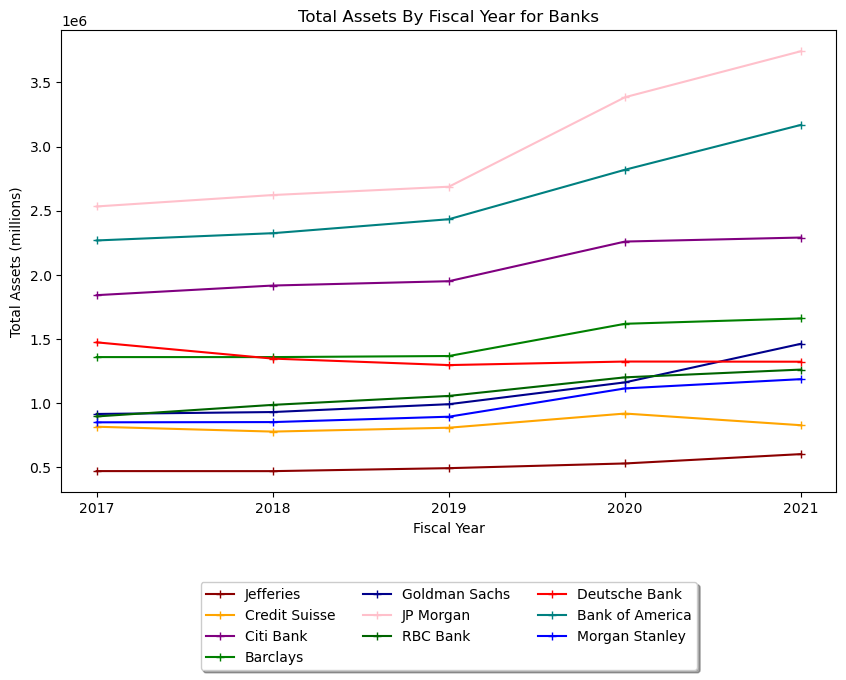

In [25]:
#Total Assets
i = 0
bank_list = bank_data_df['Bank'].unique()
plt.figure(figsize=(10,6))

while i < len(bank_list):
    plt.plot(year, bank_data_df.loc[bank_data_df['Bank'] == bank_list[i], ['Total Assets']], marker ='+',
                color = color_scheme[i], label=bank_list[i])
    i += 1
plt.locator_params(axis="both", integer=True)
plt.xlabel("Fiscal Year")
plt.ylabel("Total Assets (millions)")
plt.xticks(x_tick_locations)
plt.title("Total Assets By Fiscal Year for Banks")
legend= plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.40),
          ncol=3, fancybox=True, shadow=True)

plt.show()
#    |||     working on changing 
#    VVV   these to integers "1e6"

In [26]:
#############################################################

## What are the size of the banks currently based on total revenue and total assets and how do they compare to IB fees??

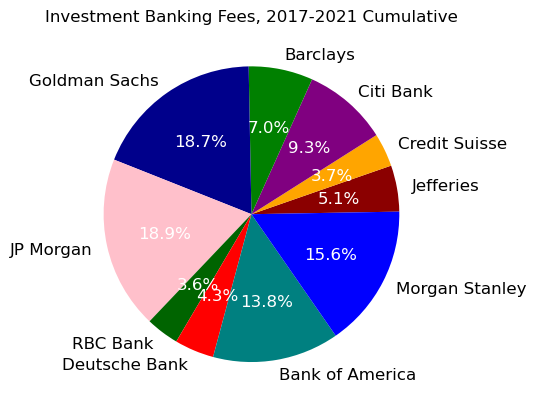

In [48]:
bank_list = bank_data_df['Bank'].unique()

i = 0

bank_pie = []

while i < len(bank_list):
    bank_pie.append(bank_data_df.loc[bank_data_df['Bank'] == bank_list[i],['Total IB Fees']]['Total IB Fees'].sum())
    i += 1

_,_,inner_text = plt.pie(bank_pie, startangle=1, labels=bank_list, autopct='%1.1f%%',
                         textprops={'size': 'large'}, colors=color_scheme)

[inner_text[i].set_color('white') for i in range(len(inner_text))]
plt.figure(1)
plt.title("Investment Banking Fees, 2017-2021 Cumulative")

plt.show()

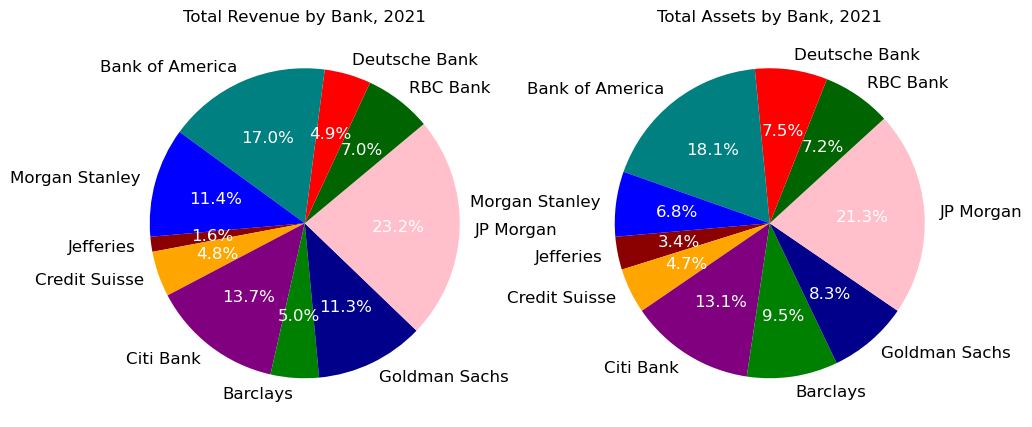

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11,11))

revenue_2021 = bank_data_df.groupby('Bank').head(1)
bank_list = []
revenue_list = []
for row in revenue_2021.iterrows():
    bank_list = revenue_2021['Bank']
    revenue_list = revenue_2021['Total Revenue']
TR_pie = np.array(revenue_list)
ax1.set_title("Total Revenue by Bank, 2021")
_,_,inner_text = ax1.pie(revenue_list, startangle=185,labels=bank_list, autopct='%1.1f%%', textprops={'size': 'large'}, colors=color_scheme)
[inner_text[i].set_color('white') for i in range(len(inner_text))]
plt.figure(1)

assets_2021 = bank_data_df.groupby('Bank').head(1)
bank_list = []
assets_list = []
for row in assets_2021.iterrows():
    bank_list = assets_2021['Bank']
    assets_list = assets_2021['Total Assets']
assets_pie = np.array(assets_list)
ax2.set_title("Total Assets by Bank, 2021")
_,_,inner_text = ax2.pie(assets_list, startangle=185, labels=bank_list, autopct='%1.1f%%', textprops={'size': 'large'}, colors=color_scheme)

[inner_text[i].set_color('white') for i in range(len(inner_text))]
plt.figure(1)

plt.show()

## How big of a portion of these banks non-interest income are IB fees?

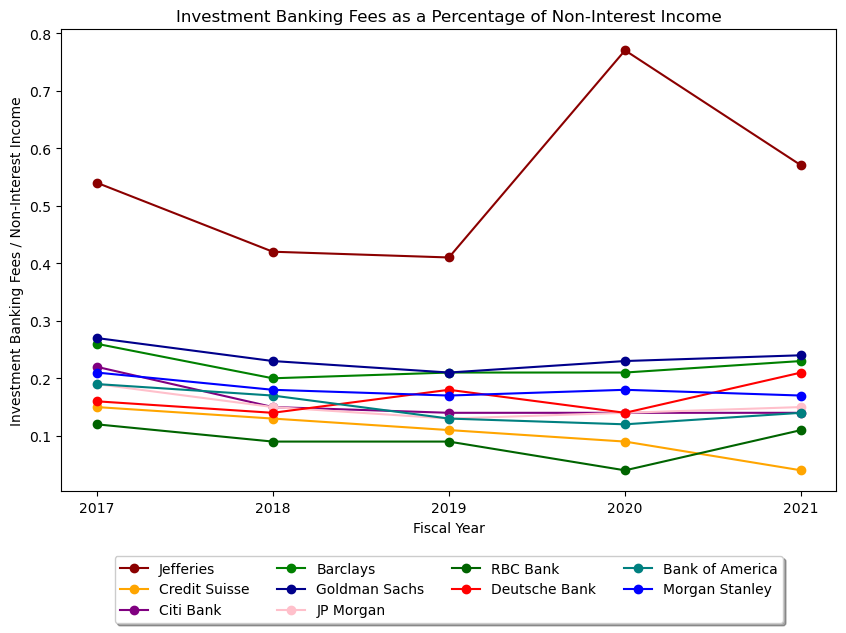

In [15]:
plt.figure(figsize=(10,6))
bank_list = bank_data_df['Bank'].unique()
i = 0
while i < len(bank_list):
    plt.plot(year, bank_data_df.loc[bank_data_df['Bank'] == bank_list[i],
             ['IB Fees as a % of Non-Interest Income']].iloc[::-1], marker ='o',
             color = color_scheme[i], label=bank_list[i])
    i += 1
plt.xticks(x_tick_locations)
plt.title("Investment Banking Fees as a Percentage of Non-Interest Income")
plt.xlabel("Fiscal Year")
plt.ylabel("Investment Banking Fees / Non-Interest Income")
legend= plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30),
          ncol=4, fancybox=True, shadow=True)

plt.show()

In [50]:
bank_list

array(['Jefferies', 'Credit Suisse', 'Citi Bank', 'Barclays',
       'Goldman Sachs', 'JP Morgan', 'RBC Bank', 'Deutsche Bank',
       'Bank of America', 'Morgan Stanley'], dtype=object)

## What are some statistical trends in the data?

The r-value is : 0.3102789280393081


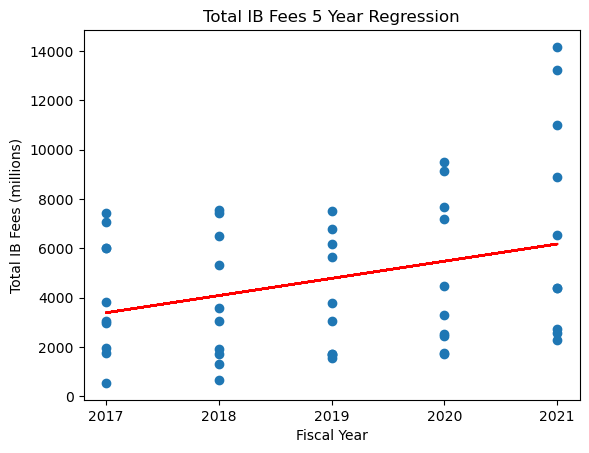

In [51]:
def linear_regression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

fig1, ax1 = plt.subplots()

equation = linear_regression(bank_data_df["Fiscal Year"], bank_data_df["Total IB Fees"])
annotate(equation, 0, -3)
 
plt.xlabel("Fiscal Year")
plt.ylabel("Total IB Fees (millions)")
plt.xticks(x_tick_locations)
plt.title("Total IB Fees 5 Year Regression")

plt.show()

In [52]:
## In conclusion, we found that the banks at the top of IB , for the past half decade,normally do not move much in overall market share, with more variability surrounding the lower market shares: although smaller investment bank income does not necessarily mean a smaller income statement or balance sheet. We also found that for pretty much all the top investment banks, IB fees make up about the same amount of non-interest income each year, with the exception being Jefferies. It is evident that there is a general trend of investment banking increase over the five year period, even throughout the pandemic, which we found to be interesting. 

<h2>Some Conclusions:</h2>

<hr>

<div class="alert alert-block alert-success">
    <ul><h3>
        <li>top investment banks for the last half-decade have not moved much in overall market share</li>
        <li>lower market share banks exhibit more volatility than their larger counterparts</li>
        <li>smaller investment bank income does not necessarily mean a smaller balance sheet</li>
        <li>with the exception of Jefferies, IB fees make up about the same amount of non-interest income for large investment banks</li>
        <li>for the last five years investment banking activity has been in an upward trend, even during the pandemic</li>
    </ul>
</div>

<hr>